In [21]:
import numpy as np
from model import LotkaVolterraModel
from summstats import LotkaVolterraStats

import matplotlib.pyplot as plt

import delfi.distribution as dd
import delfi.generator as dg
import delfi.inference as infer
from delfi.utils.viz import plot_pdf

%run -i ../../DDELFI.py

from parameters import ParameterSet

%matplotlib notebook

In [22]:
params = ParameterSet({})

params.seed = 42

params.model = ParameterSet({})
params.model.dt = 0.2
params.model.T = 30

params.logparam_limits = (-5,2)

params.true_params = np.log([0.01, 0.5, 1, 0.01])

params.res = ParameterSet({})
params.res.n_hiddens = [20,20]
params.res.convert_to_T = 3
params.res.pilot_samples = 1000
params.res.svi = False

params.train = ParameterSet({})
params.train.n_train = 5000
params.train.n_rounds = 2

In [23]:
m = LotkaVolterraModel(dt=params.model.dt, T=params.model.T, seed=params.seed)
param_limits = np.reshape(params.logparam_limits, (2,1)) * np.ones((1,len(params.true_params)))

p = dd.Uniform(*param_limits)
s = LotkaVolterraStats()

sample = m.gen_single(params.true_params)
params.obs_stats = s.calc([sample])[0]

In [24]:
def plot_sample(m, theta, s=None):
    fig = plt.figure()
    
    xlist = np.arange(0, m.T + m.dt, m.dt)
    
    sample = m.gen_single(theta)
    states = sample['data']
    
    for var in states:
        plt.plot(xlist, var)
        
    plt.show()
    
    if s is not None:
        print(s.calc([sample])[0])
    

<IPython.core.display.Javascript object>


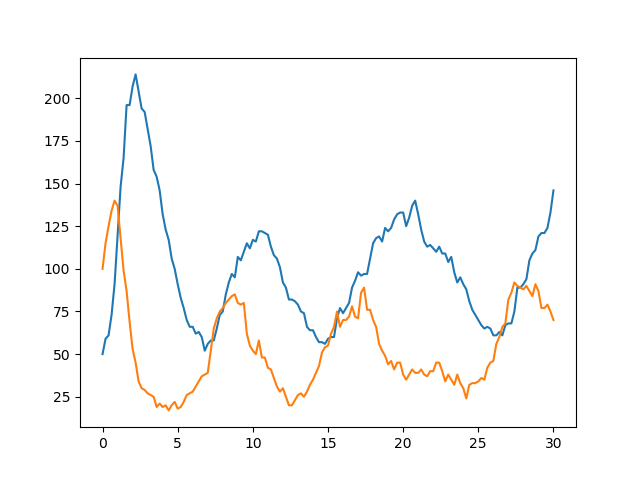

[   101.14569536     53.88741722   1252.21863135    720.62057395
  11368.69536424  11240.58278146   3551.7615894    3455.58278146
   5381.13245033]


In [25]:
plot_sample(m, params.true_params, s)

In [6]:
for i in range(0):
    sample = p.gen(n_samples=1)
    plot_sample(m, sample, s)

In [26]:
g = dg.Default(model=m, prior=p, summary=s)

In [28]:
res = DDELFI(generator=g, 
                 obs=[params.obs_stats],
                 seed=params.seed, 
                 **params.res)

ret = res.run(**params.train)

posteriors = ret[2]

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ nan]: : 13it [00:00, 73.10it/s]  

loss=[ nan]: : 1000it [00:07, 132.46it/s]


AssertionError: p must sum to 1

In [ ]:
for posterior in posteriors[-1:]:
    plot_pdf(posterior, lims=params.logparam_limits, gt=params.true_params)

In [14]:
params.save(url='setup.prm')

<IPython.core.display.Javascript object>


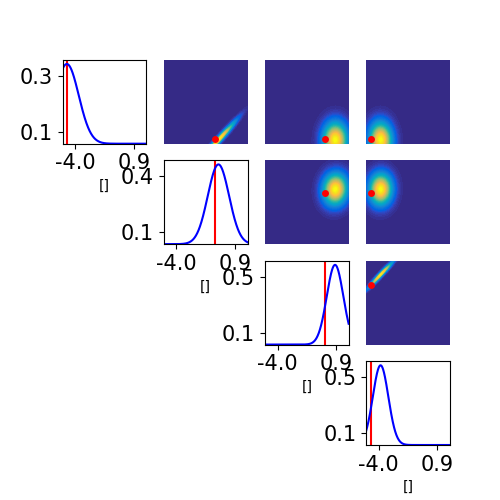

(<matplotlib.figure.Figure at 0x109ae94a8>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109af46a0>,
         <matplotlib.axes._subplots.AxesSubplot object at 0x109e19c50>]], dtype=object))

In [20]:
import dill

with open('gt_mm.pkl', 'rb') as gt_file:
    gt_post = dill.load(gt_file)

plot_pdf(gt_post, lims = params.logparam_limits, gt=params.true_params, ticks=True)